# Page View Time Series Visualizer

Throughout this project, I struggled to understand the documentation of the required functions. I also used published books as reference, but they are often not thorough. They do not fully explain the input you can place in the arguments. The positive thing at least is I think I finally understand how the set-up of a figure works. Although I managed to finish this project, I need more practice in building visualizations. 

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Importing, evaluating, and cleaning data

In [2]:
# Import data from csv file.
# Set "date" column as the index.
# Parse the dates.
# Rename the "value" column to "views"
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df = df.rename(columns={'value': 'views'})
df.head()

,views
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
# Get information about the column names, data type, and number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   views   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [4]:
# Clean the data.
# Filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df['views'] >= df['views'].quantile(0.025)) & (df['views'] <= df['views'].quantile(0.975))]
df.head()

,views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


### Draw Line Plot

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x-axis should be "Date" and the label on the y-axis should be "Page Views".

In [ ]:
# Make a copy of the dataframe.
df_line = df.copy() # The .copy() function makes sure you do not change the original.

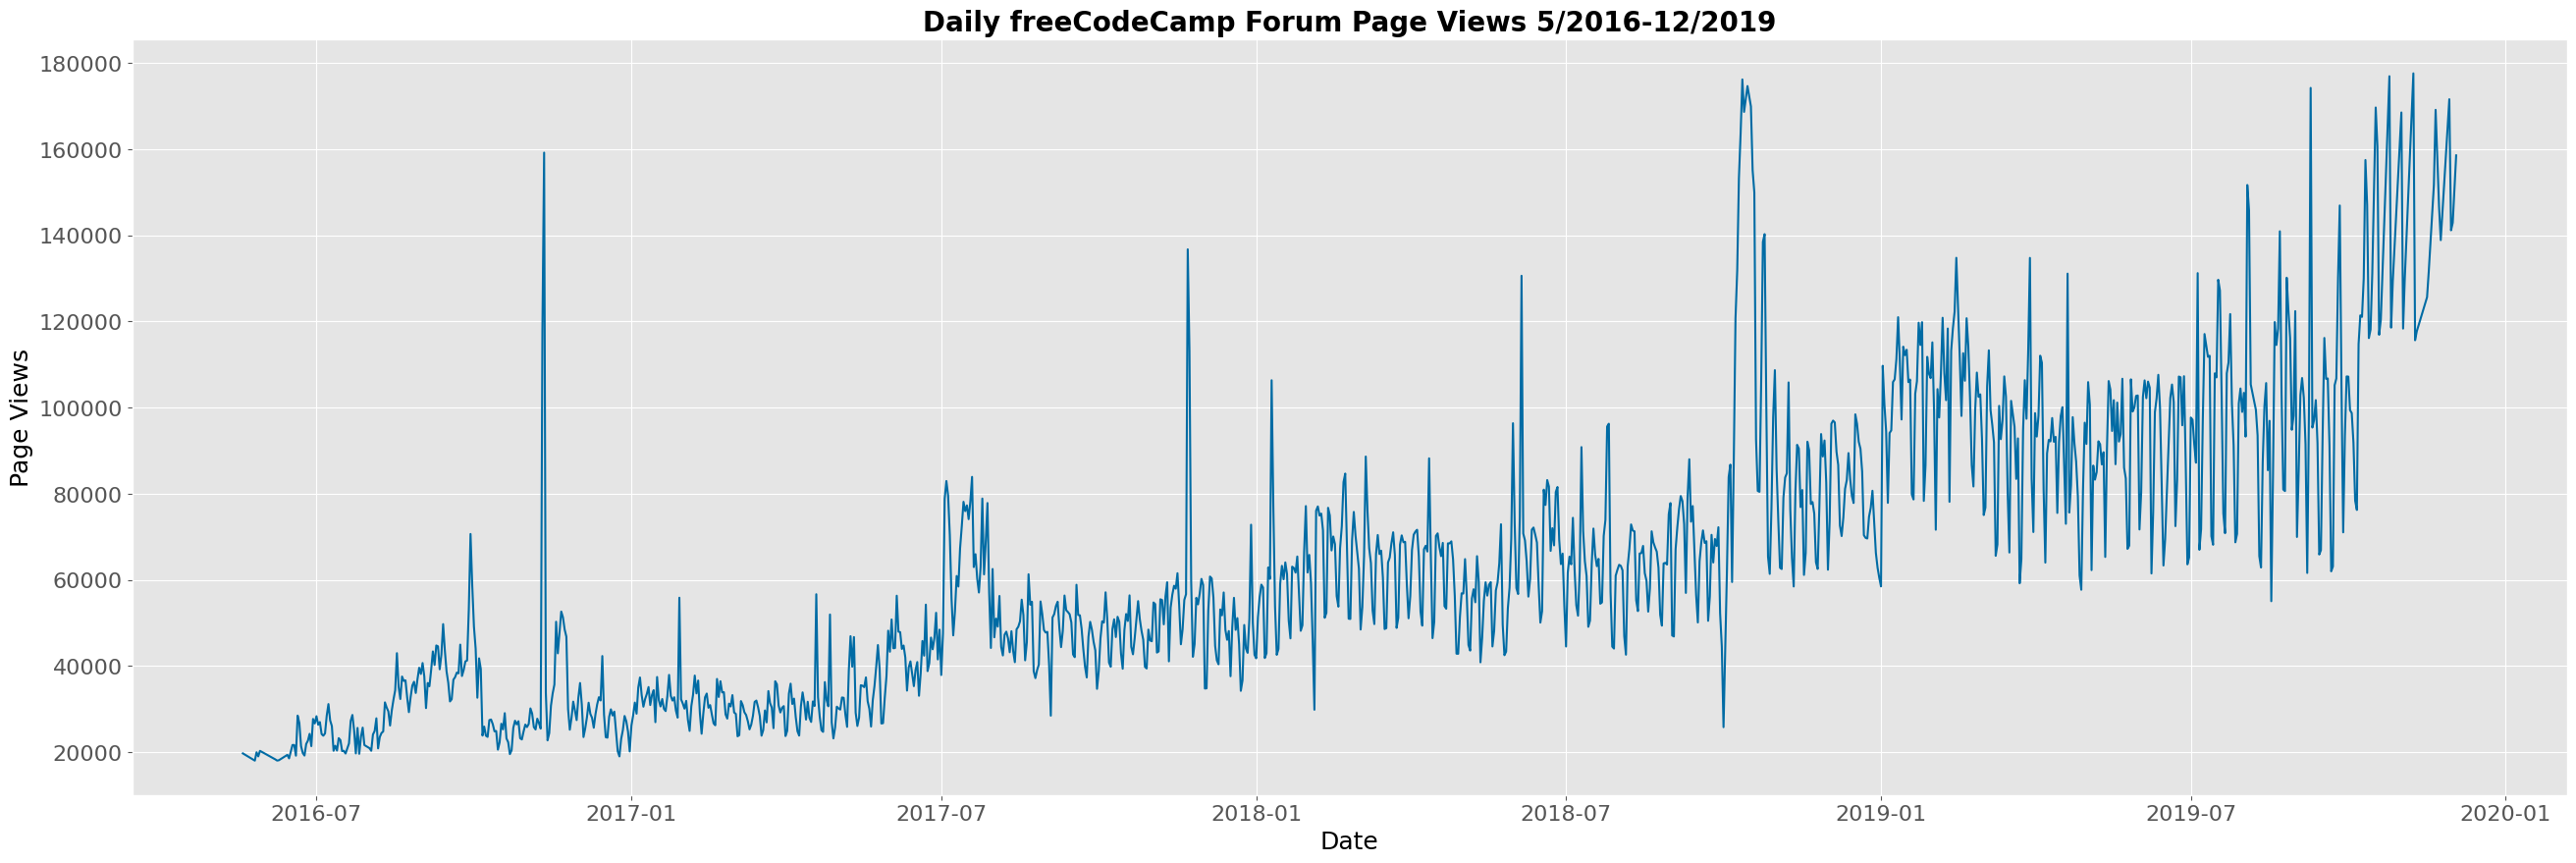

In [14]:
# Create a font dictionary
# This is not quite helpful at this scale, but I wanted to try using it.
font_labels = {'family': 'sans serif',
                'color':  'black',
                'weight': 'normal',
                'size': 18,
                }

# Use a colorblind-friendly style
# The default line is red, but this uses blue instead.
plt.style.use('tableau-colorblind10')

# Setup the figure with 32 by 10 inches dimension (w, h)
fig, ax = plt.subplots(figsize=(32, 10))

# Plot the data from the dataframe.
plt.plot(df_line) # This Recognizes the index as the y and other column as x.

# Add in the table details.
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontdict=font_labels)
plt.ylabel('Page Views', fontdict=font_labels)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Save and show the line plot figure
fig.savefig('line_plot.png')
plt.show()

### Draw Bar Plot

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x-axis should be "Years" and the label on the y-axis should be "Average Page Views".

In [94]:
# Make a copy of the dataframe for this plot.
df_bar = df.copy()

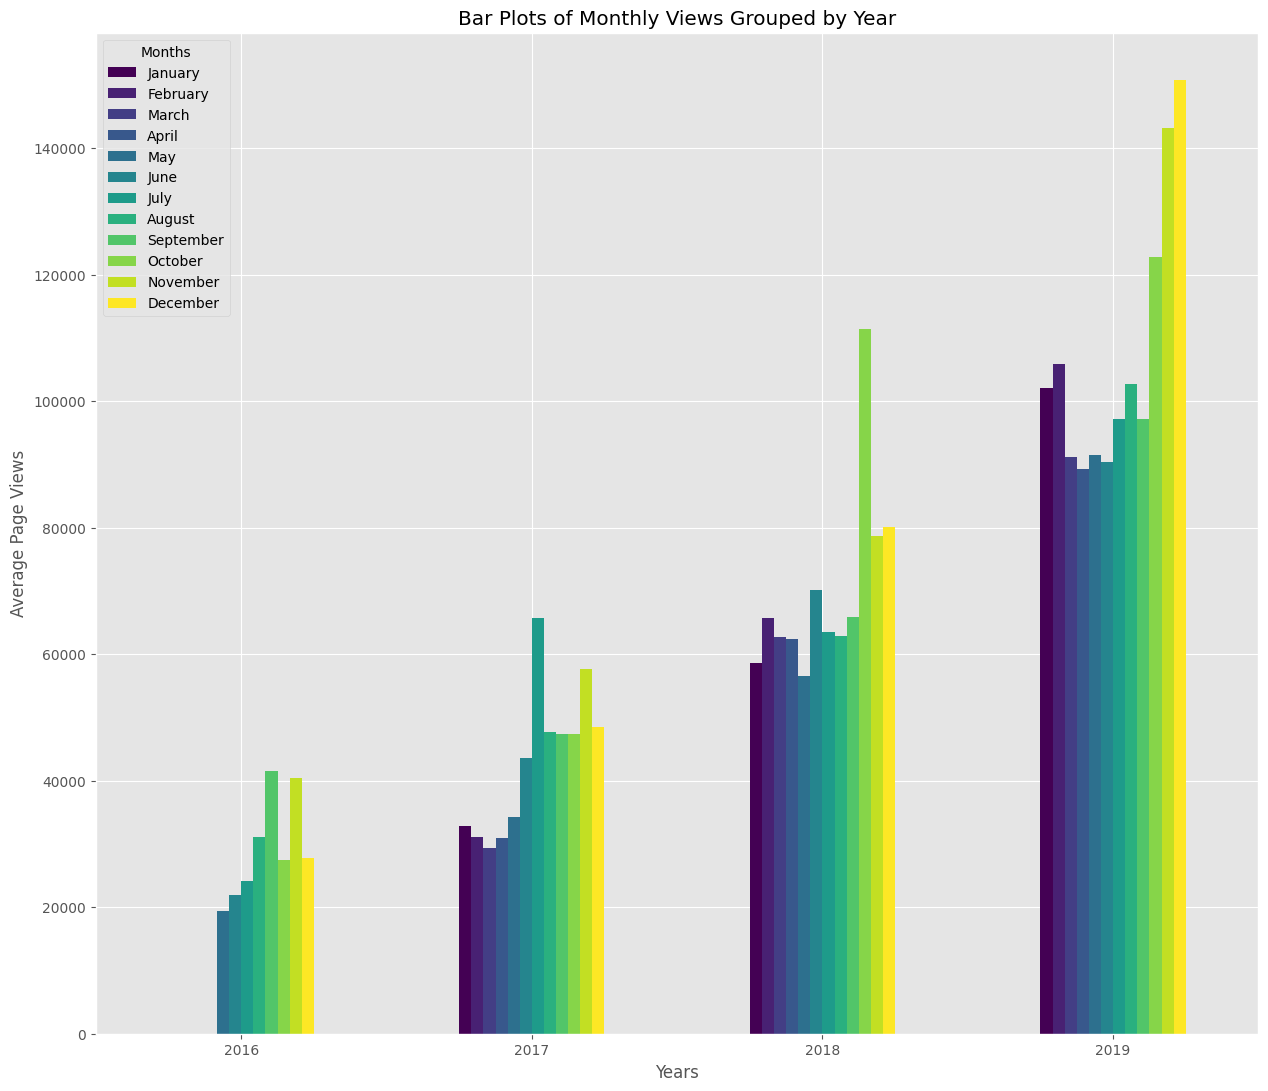

In [95]:
# Extract the year and month from the datetimeindex.
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month # Returns an integer of a string with .month_name().

# Group by year and month then calculate the mean views.
# The unstack function pivots the dataframe to have a column for each month.
df_bar = df_bar.groupby(['year', 'month']).mean().unstack()

# The unstacking removes the appropriate labels, so we use this later for the graph legends.
months_legends = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set up the figure and its dimension: 15 by 13 inches (w, h)
fig, ax = plt.subplots(figsize=(15, 13)) 

# Create the bar plot using pandas.
df_bar.plot.bar(colormap='viridis', ax=ax) # I had to specify ax=ax here, so it follows the codes above.

# Add in the table details.
plt.legend(months_legends, title='Months')
plt.title('Bar Plots of Monthly Views Grouped by Year')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.xticks(rotation ='horizontal') 

# Save and show the bar plot figure.
fig.savefig('bar_plot.png')
plt.show()

This time I was trying to understand how unstack() works.

In [41]:
# This is version without unstack.
df_bar = df_bar.groupby(['year', 'month']).mean()
df_bar

views
year month               
2016 5       19432.400000
     6       21875.105263
     7       24109.678571
     8       31049.193548
     9       41476.866667
     10      27398.322581
     11      40448.633333
     12      27832.419355
2017 1       32785.161290
     2       31113.071429
     3       29369.096774
     4       30878.733333
     5       34244.290323
     6       43577.500000
     7       65806.838710
     8       47712.451613
     9       47376.800000
     10      47438.709677
     11      57701.566667
     12      48420.580645
2018 1       58580.096774
     2       65679.000000
     3       62693.774194
     4       62350.833333
     5       56562.870968
     6       70117.000000
     7       63591.064516
     8       62831.612903
     9       65941.733333
     10     111378.142857
     11      78688.333333
     12      80047.483871
2019 1      102056.516129
     2      105968.357143
     3       91214.483871
     4       89368.433333
     5       91439.903226
     6       90435.642857
     7       97236.566667
     8      102717.310345
     9       97268.833333
     10     122802.272727
     11     143166.428571
     12     150733.500000

In [42]:
# Note that it created a multiindex.
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 44 entries, (2016, 5) to (2019, 12)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   views   44 non-null     float64
dtypes: float64(1)
memory usage: 595.0 bytes


In [45]:
# This is with unstack.
df_bar = df_bar.groupby(['year', 'month']).mean().unstack()
df_bar

views                                                           \
month             1              2             3             4             5    
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

                                                                               \
month            6             7              8             9              10   
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

                                     
month             11             12  
year                                 
2016    40448.633333   27832.419355  
2017    57701.566667   48420.580645  
2018    78688.333333   80047.483871  
2019   143166.428571  150733.500000

In [46]:
# This creates a year index.
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 2016 to 2019
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (views, 1)   3 non-null      float64
 1   (views, 2)   3 non-null      float64
 2   (views, 3)   3 non-null      float64
 3   (views, 4)   3 non-null      float64
 4   (views, 5)   4 non-null      float64
 5   (views, 6)   4 non-null      float64
 6   (views, 7)   4 non-null      float64
 7   (views, 8)   4 non-null      float64
 8   (views, 9)   4 non-null      float64
 9   (views, 10)  4 non-null      float64
 10  (views, 11)  4 non-null      float64
 11  (views, 12)  4 non-null      float64
dtypes: float64(12)
memory usage: 400.0 bytes


In [70]:
#df_bar['month'] = df_bar['date'].dt.month
#df_bar['daily_ave'] = df_bar['views'].groupby(by=[df_bar.index.month, df_bar.index.year]).mean()
df_bar = df.groupby(pd.Grouper(level='date', freq='ME')).mean() 
df_bar.head()

,views
date,
2016-05-31,19432.400000
2016-06-30,21875.105263
2016-07-31,24109.678571
2016-08-31,31049.193548
2016-09-30,41476.866667


This is me trying to understand how the `reset_index` function works. 

In [29]:
# This is without the reset_index().
df_bar = df_bar.groupby(['year', 'month']).mean()
df_bar

views
year month                   
2016 August      31049.193548
     December    27832.419355
     July        24109.678571
     June        21875.105263
     May         19432.400000
     November    40448.633333
     October     27398.322581
     September   41476.866667
2017 April       30878.733333
     August      47712.451613
     December    48420.580645
     February    31113.071429
     January     32785.161290
     July        65806.838710
     June        43577.500000
     March       29369.096774
     May         34244.290323
     November    57701.566667
     October     47438.709677
     September   47376.800000
2018 April       62350.833333
     August      62831.612903
     December    80047.483871
     February    65679.000000
     January     58580.096774
     July        63591.064516
     June        70117.000000
     March       62693.774194
     May         56562.870968
     November    78688.333333
     October    111378.142857
     September   65941.733333
2019 April       89368.433333
     August     102717.310345
     December   150733.500000
     February   105968.357143
     January    102056.516129
     July        97236.566667
     June        90435.642857
     March       91214.483871
     May         91439.903226
     November   143166.428571
     October    122802.272727
     September   97268.833333

In [30]:
# Note the multiindex formed.
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 44 entries, (2016, 'August') to (2019, 'September')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   views   44 non-null     float64
dtypes: float64(1)
memory usage: 643.0+ bytes


In [26]:
# This is with the reset_index()
df_bar = df_bar.groupby(['year', 'month']).mean().reset_index()
df_bar

,year,month,views
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000
5,2016,November,40448.633333
6,2016,October,27398.322581
7,2016,September,41476.866667
8,2017,April,30878.733333
9,2017,August,47712.451613


In [28]:
# Note that this one has datetimeindex.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   views   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


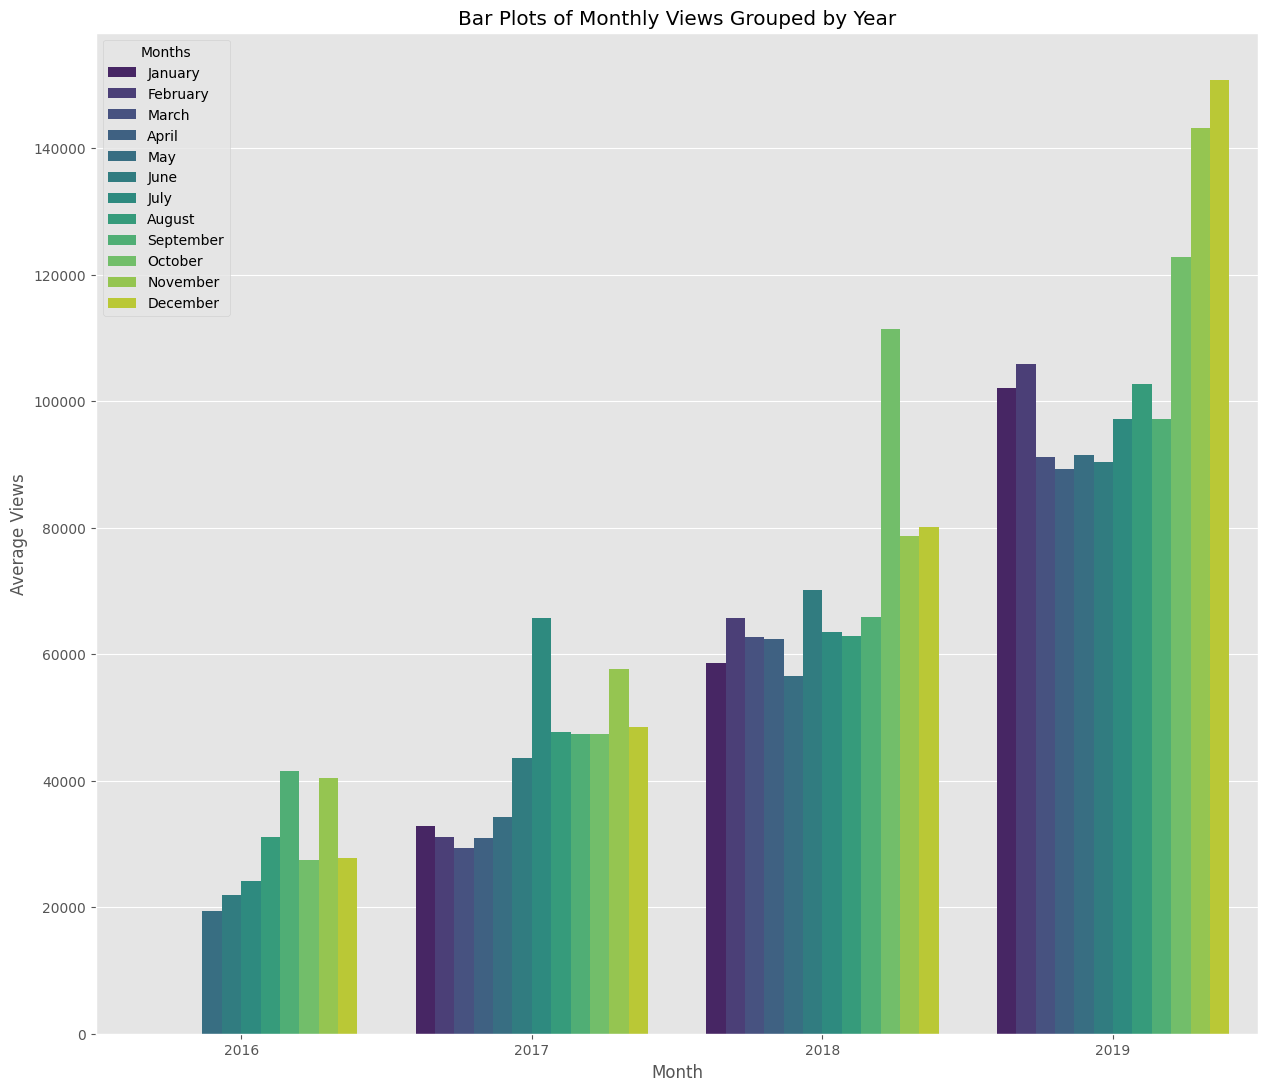

In [71]:
# This was my initial work, but using seaborn fails the test.
# Copy the data for this bar plot.
df_bar = df.copy()

# Extract year and month from the date index
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month_name()

# Group by year and month then calculate the mean views.
# Resets the index back to the datetime index from the year and month multi-index.
df_bar = df_bar.groupby(['year', 'month']).mean().reset_index()

# Create a list of months in order.
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plotting using seaborn
# Set up the figure with 15 by 13 dimension (w, h)
fig, ax = plt.subplots(figsize=(15, 13))

# Create a seaborn barplot.
# The hue creates bars for each month grouped by year.
# The hue_order was needed because of the missing values at the beginning of the dataframe.
# This starts the bars at the wrong month.
sns.barplot(x='year', y='views', hue='month', hue_order=month_order, data=df_bar, palette='viridis', errorbar=None)

# Add in the table details.
plt.title('Bar Plots of Monthly Views Grouped by Year')
plt.xlabel('Month')
plt.ylabel('Average Views')
plt.legend(title='Months')

# Save and show the bar plot figure.
fig.savefig('bar_plot.png')
plt.show()


### Draw Box Plot

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at Jan and the x- and y-axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [81]:
# Make copy of the dataframe for the box plot.
df_box = df.copy()

In [82]:
# This set of codes is already given.
# Prepare data for box plots (this part is done!)

# Make a copy of the dataframe for the box plot.
df_box = df.copy()

# Reset the index and modify the dataframe; otherwise, it needs to be assigned.
df_box.reset_index(inplace=True)

# Extract the year and month from the date column.
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date] # Extracts it as the months abbreviated.

# Creates a list, which will be used to order the boxes later.
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

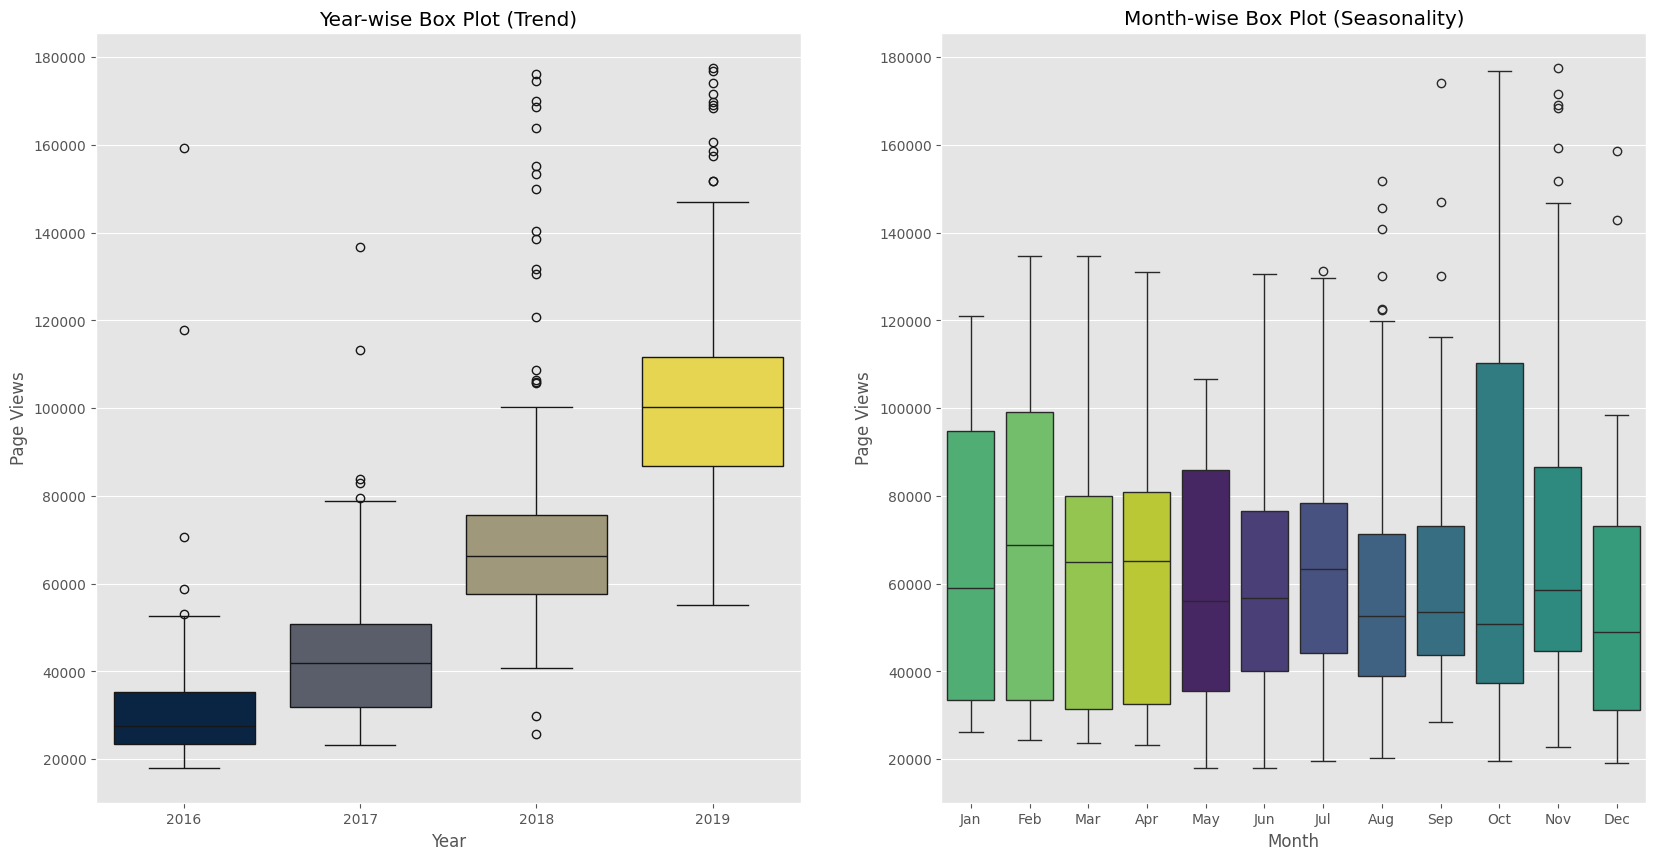

In [88]:
# Set up the figure with 20 by 10 dimensions (w, h)
# Create one row and two columns.
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Draw box plots using seaborn.
# Note: Passing `palette` without assigning `hue` is deprecated.

# Create the first box plot in the first column.
# Create box plots for each year using hue.
sns.boxplot(data=df_box, x='year', y='views', hue='year', palette='cividis', ax=axs[0], legend=False) 
axs[0].set_title('Year-wise Box Plot (Trend)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Page Views')

# Create the second box plot in the second column.
# Create box plots for each month using hue.
sns.boxplot(data=df_box, x='month', y='views', hue='month', order=month_order, palette='viridis', ax=axs[1])
axs[1].set_title('Month-wise Box Plot (Seasonality)')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Page Views')

# Save image and show the box plots.
fig.savefig('box_plot.png')
plt.show()